In [1]:
# conda activate WeatherModel

from bids.layout import BIDSLayout

import numpy as np

import pandas as pd

from nilearn.glm.first_level import FirstLevelModel

from nilearn.plotting import plot_design_matrix

from nilearn.glm import cluster_level_inference

from nilearn.plotting import plot_stat_map, plot_glass_brain

from nilearn.glm.thresholding import threshold_stats_img

import matplotlib.pyplot as plt

import warnings
from nilearn import plotting
from nilearn.reporting import get_clusters_table

# Avoid getting warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    

In [2]:
ds_path = '/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids'

# Initialize the BIDS layout and include the derivatives in it
layout = BIDSLayout(ds_path, derivatives = True)


In [3]:
sID = '04'
anat = layout.get(subject=sID, datatype='anat', desc='preproc', extension='.nii.gz', \
                  return_type='filename')

anat = [f for f in anat if "MNI" not in f]

print('Subject''s', sID, 'preprocessed anatomical image:')
print(*anat, sep='\n')

Subjects 04 preprocessed anatomical image:
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/anat/sub-04_acq-mprage_desc-preproc_T1w.nii.gz


In [4]:
bold = layout.get(subject=sID, datatype='func', space='T1w', desc='preproc', extension='.nii.gz', \
                 return_type='filename')
print('\nSubject''s', sID, 'preprocessed functional images:')
print(*bold, sep='\n')


Subjects 04 preprocessed functional images:
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/func/sub-04_task-gesture_run-1_space-T1w_desc-preproc_bold.nii.gz
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/func/sub-04_task-gesture_run-2_space-T1w_desc-preproc_bold.nii.gz
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/func/sub-04_task-gesture_run-3_space-T1w_desc-preproc_bold.nii.gz
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/func/sub-04_task-gesture_run-4_space-T1w_desc-preproc_bold.nii.gz
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/func/sub-04_task-gesture_run-5_space-T1w_desc-preproc_bold.nii.gz


In [5]:
events = layout.get(subject=sID, datatype='func', suffix='events', extension=".tsv", return_type='filename')
print('Subject''s', sID, 'event files:')
print(*events, sep='\n')

Subjects 04 event files:
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/sub-04/func/sub-04_task-gesture_run-01_events.tsv
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/sub-04/func/sub-04_task-gesture_run-02_events.tsv
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/sub-04/func/sub-04_task-gesture_run-03_events.tsv
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/sub-04/func/sub-04_task-gesture_run-04_events.tsv
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/sub-04/func/sub-04_task-gesture_run-05_events.tsv


In [6]:
events_run1 = pd.read_table(events[0])
confounds = layout.get(subject=sID, datatype='func', desc='confounds', extension=".tsv", return_type='filename')
confounds_run1 = pd.read_table(confounds[0])
print('Subject''s', sID, 'confound files:')
print(*confounds, sep='\n')


Subjects 04 confound files:
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/func/sub-04_task-gesture_run-1_desc-confounds_timeseries.tsv
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/func/sub-04_task-gesture_run-2_desc-confounds_timeseries.tsv
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/func/sub-04_task-gesture_run-3_desc-confounds_timeseries.tsv
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/func/sub-04_task-gesture_run-4_desc-confounds_timeseries.tsv
/Users/jonathantsay/GestureContextPilot/CodeForExp/JT_Semantomotor/data/bids/derivatives/fmriprep/sub-04/func/sub-04_task-gesture_run-5_desc-confounds_timeseries.tsv


In [7]:
confounds_of_interest = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
confounds_run1[confounds_of_interest]

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z
0,0.086040,0.348142,0.064471,-0.000468,0.007194,0.006458
1,0.089909,0.294506,0.040654,-0.000200,0.007565,0.006719
2,0.090801,0.399182,0.047509,-0.000241,0.007381,0.007003
3,0.089254,0.291112,0.025980,0.000192,0.007700,0.006443
4,0.101151,0.390976,0.027948,0.000564,0.007488,0.006850
...,...,...,...,...,...,...
372,-0.152843,0.928009,0.086714,-0.000113,0.012826,0.000982
373,-0.177568,0.775624,0.038614,-0.000059,0.013675,0.001181
374,-0.153958,0.913867,0.093071,-0.000763,0.013059,0.001327
375,-0.154060,0.748546,0.032667,-0.000605,0.013308,0.001400


In [8]:
confounds_glm = []
for conf_file in confounds:
    this_conf = pd.read_table(conf_file)
    conf_subset = this_conf[confounds_of_interest].fillna(0) # replace NaN with 0
    confounds_glm.append(conf_subset)


In [9]:
# Get the TR
TR = layout.get_tr()
print('TR:', TR)

TR: 1.5


In [10]:
fmri_glm = FirstLevelModel(
    t_r = TR,
    slice_time_ref = TR/2,
    hrf_model = 'spm',
    drift_model = 'Cosine',
    high_pass = 1./128,
    smoothing_fwhm = 2,
    noise_model = 'ar1'
)

In [11]:
fmri_glm = fmri_glm.fit(bold, events, confounds_glm)

/Users/jonathantsay/anaconda3/envs/WeatherModel/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'trial_fixation.started' in events data. It will be ignored.
  warnings.warn(
/Users/jonathantsay/anaconda3/envs/WeatherModel/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'ms_txt' in events data. It will be ignored.
  warnings.warn(
/Users/jonathantsay/anaconda3/envs/WeatherModel/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'gesture_image' in events data. It will be ignored.
  warnings.warn(
/Users/jonathantsay/anaconda3/envs/WeatherModel/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'jitter.started' in events data. It will be ignored.
  warnings.warn(
/Users/jonathantsay/anaconda3/envs/WeatherModel/lib/python3.11/site-packages/

In [12]:
design_matrices = fmri_glm.design_matrices_
design_matrices[0]

,1,2,3,4,5,6,7,8,9,10,...,rot_z,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,drift_7,drift_8,constant
1.125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006458,0.072835,0.072833,0.072830,0.072826,0.072820,0.072813,0.072805,0.072795,1.0
2.625,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006719,0.072830,0.072813,0.072784,0.072745,0.072693,0.072631,0.072557,0.072472,1.0
4.125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007003,0.072820,0.072772,0.072693,0.072583,0.072441,0.072267,0.072063,0.071826,1.0
5.625,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006443,0.072805,0.072712,0.072557,0.072341,0.072063,0.071723,0.071323,0.070862,1.0
7.125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006850,0.072784,0.072631,0.072375,0.072018,0.071559,0.071000,0.070341,0.069583,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559.125,0.0,0.0,0.0,-0.001518,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000982,-0.072784,0.072631,-0.072375,0.072018,-0.071559,0.071000,-0.070341,0.069583,1.0
560.625,0.0,0.0,0.0,-0.000737,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001181,-0.072805,0.072712,-0.072557,0.072341,-0.072063,0.071723,-0.071323,0.070862,1.0
562.125,0.0,0.0,0.0,-0.000269,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001327,-0.072820,0.072772,-0.072693,0.072583,-0.072441,0.072267,-0.072063,0.071826,1.0
563.625,0.0,0.0,0.0,-0.000047,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001400,-0.072830,0.072813,-0.072784,0.072745,-0.072693,0.072631,-0.072557,0.072472,1.0


<Axes: title={'center': 'Expected responses per condition'}, xlabel='Seconds'>

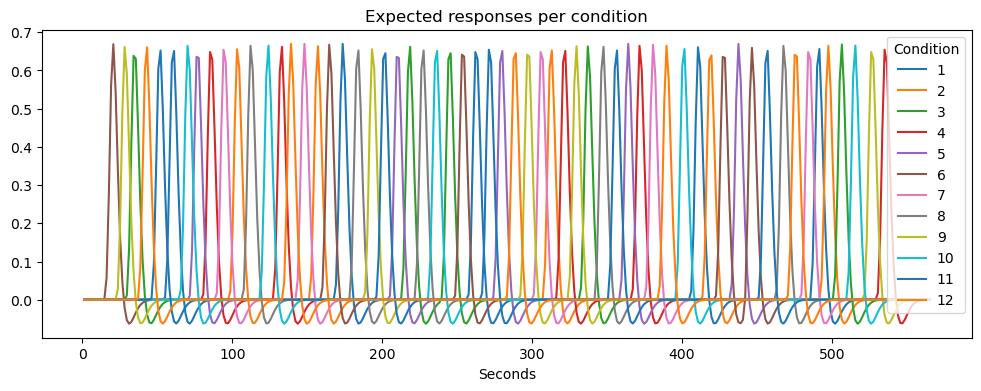

In [13]:
dm = design_matrices[0]
dm = dm.iloc[:, :12]  # Extracts the first 10 columns from the DataFrame
dm.columns.name = 'Condition'
dm.index.name = 'Seconds'
dm.plot(figsize=(12,4), title='Expected responses per condition')

<Axes: title={'center': 'Expected signal'}, xlabel='Seconds'>

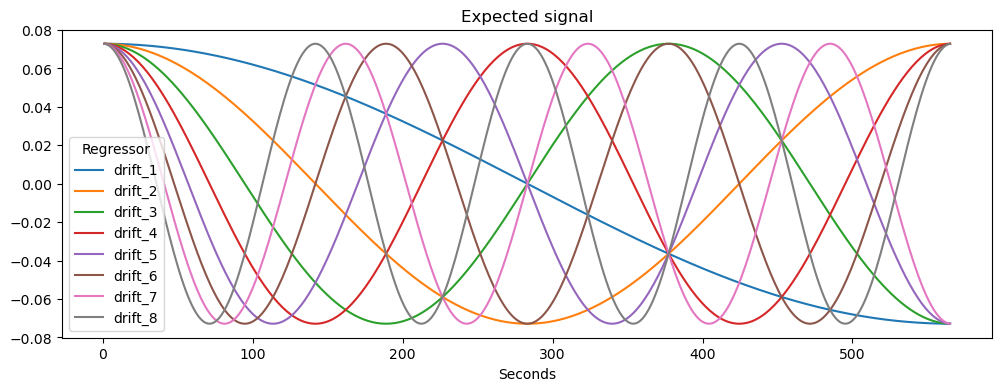

In [14]:
# let's see how the modelled noise regressors look
dm = design_matrices[0]
dm = dm.iloc[:, 18:26] 
dm.columns.name = 'Regressor'
dm.index.name = 'Seconds'
dm.plot(figsize=(12,4), title='Expected signal')

<Axes: title={'center': 'Expected signal'}, xlabel='Seconds'>

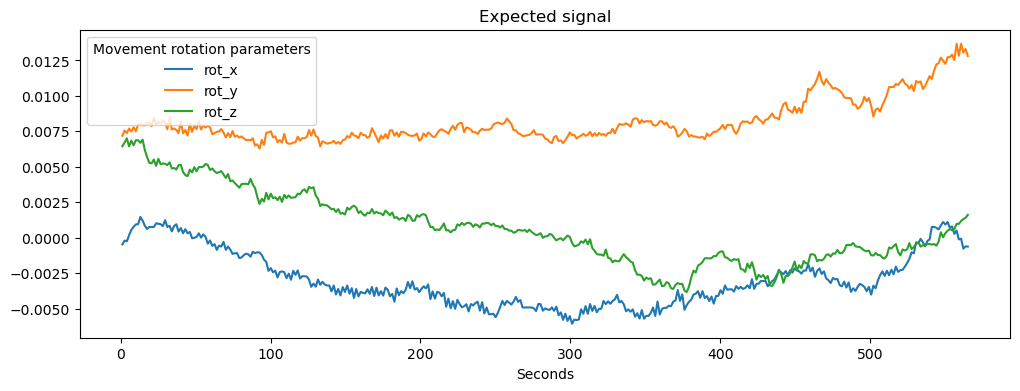

In [15]:
# let's see how the rotation movement parameters look
dm = design_matrices[0]
dm = dm.iloc[:, 15:18] 
dm.columns.name = 'Movement rotation parameters'
dm.plot(figsize=(12,4), title='Expected signal')

<Axes: title={'center': 'Expected signal'}, xlabel='Seconds'>

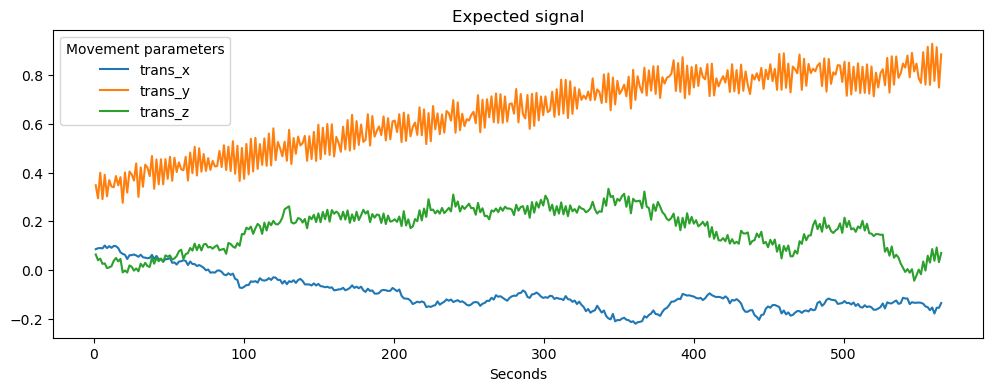

In [16]:
# let's see how the movement parameters look
dm = design_matrices[0]
dm = dm.iloc[:, 12:15] 
dm.columns.name = 'Movement parameters'
dm.plot(figsize=(12,4), title='Expected signal')

Design matrix for run 1


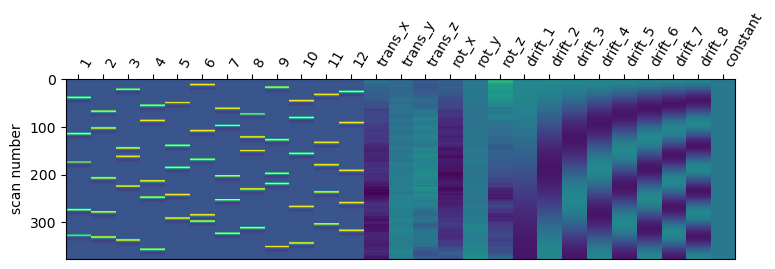

Design matrix for run 2


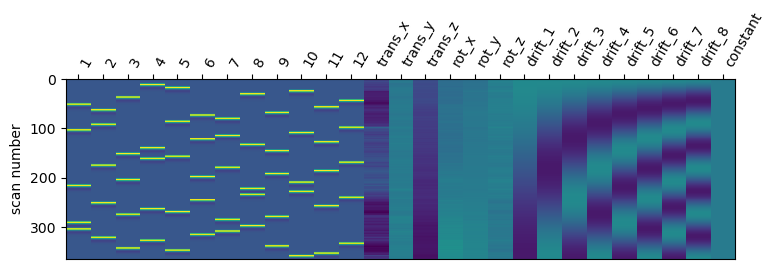

Design matrix for run 3


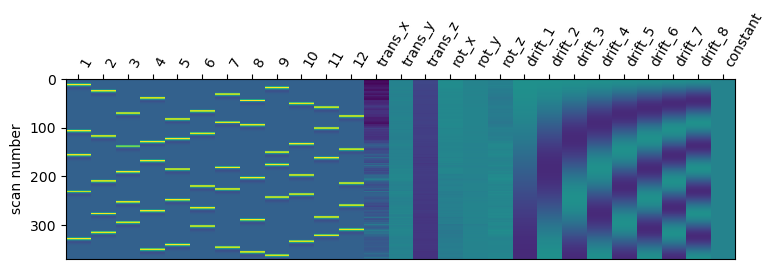

Design matrix for run 4


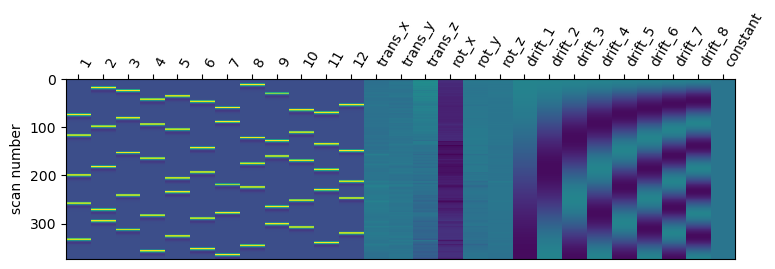

Design matrix for run 5


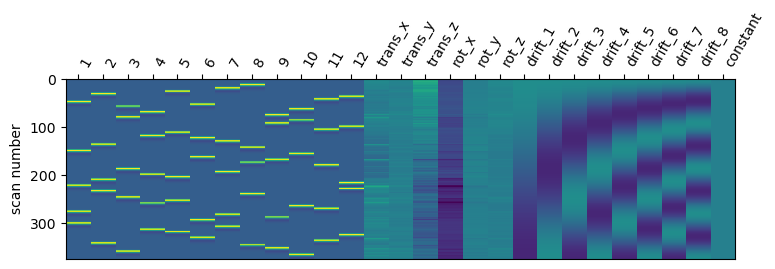

In [17]:
for i, dm in enumerate(design_matrices):
    print('Design matrix for run', i+1)
    plot_design_matrix(dm, output_file=None)
    fig = plt.gcf()
    fig.set_size_inches(8,2)
    plt.show()

In [18]:
contrast_list = []

for design_matrix in design_matrices:
    
    """A small routine to append zeros in contrast vectors"""
    n_columns = design_matrix.shape[1] #number of predictors in our model
    def pad_vector(contrast_, n_columns):    
        return np.hstack((contrast_, np.zeros(n_columns - len(contrast_))))
    
    contrasts = {'L1': pad_vector([1, 0, 0, 0, 
                                   0, 0, 0, 0, 
                                   0, 0, 0, 0], n_columns),
                 'N1': pad_vector([0, 1, 0, 0, 
                                   0, 0, 0, 0, 
                                   0, 0, 0, 0], n_columns),
                 'Ac1': pad_vector([0, 0, 1, 0, 
                                   0, 0, 0, 0, 
                                   0, 0, 0, 0], n_columns),
                 'Ab1': pad_vector([0, 0, 0, 1, 
                                   0, 0, 0, 0, 
                                   0, 0, 0, 0], n_columns),
                 'L2': pad_vector([0, 0, 0, 0, 
                                   1, 0, 0, 0, 
                                   0, 0, 0, 0], n_columns),
                 'N2': pad_vector([0, 0, 0, 0, 
                                   0, 1, 0, 0, 
                                   0, 0, 0, 0], n_columns),
                 'Ac2': pad_vector([0, 0, 0, 0, 
                                   0, 0, 1, 0, 
                                   0, 0, 0, 0], n_columns),
                 'Ab2': pad_vector([0, 0, 0, 0, 
                                   0, 0, 0, 1, 
                                   0, 0, 0, 0], n_columns),
                 'L3': pad_vector([0, 0, 0, 0, 
                                   0, 0, 0, 0, 
                                   1, 0, 0, 0], n_columns),
                 'N3': pad_vector([0, 0, 0, 0, 
                                   0, 0, 0, 0, 
                                   0, 1, 0, 0], n_columns),
                 'Ac3': pad_vector([0, 0, 0, 0, 
                                   0, 0, 0, 0, 
                                   0, 0, 1, 0], n_columns),
                 'Ab3': pad_vector([0, 0, 0, 0, 
                                   0, 0, 0, 0, 
                                   0, 0, 0, 1], n_columns),
                 'move_v_rest': pad_vector([1, 1, 1, 1, 
                                     1, 1, 1, 1, 
                                     1, 1, 1, 1], n_columns), 
                 'palm_v_rest': pad_vector([1, 1, 1, 1, 
                                     0, 0, 0, 0, 
                                     0, 0, 0, 0], n_columns),
                 'fist_v_rest': pad_vector([0, 0, 0, 0, 
                                     1, 1, 1, 1, 
                                     0, 0, 0, 0], n_columns),
                 'peace_v_rest': pad_vector([0, 0, 0, 0, 
                                      0, 0, 0, 0, 
                                     1, 1, 1, 1], n_columns), 
                 'letter_v_rest': pad_vector([1, 0, 0, 0, 
                                       1, 0, 0, 0, 
                                       1, 0, 0, 0], n_columns), 
                 'number_v_rest': pad_vector([0, 1, 0, 0, 
                                       0, 1, 0, 0, 
                                       0, 1, 0, 0], n_columns), 
                 'action_v_rest': pad_vector([0, 0, 1, 0, 
                                       0, 0, 1, 0, 
                                       0, 0, 1, 0], n_columns), 
                 'abstract_v_rest': pad_vector([0, 0, 0, 1, 
                                        0, 0, 0, 1, 
                                       0, 0, 0, 1], n_columns),
                 'palm_v_other': pad_vector([2, 2, 2, 2, 
                                     -1, -1, -1, -1, 
                                     -1, -1, -1, -1], n_columns),
                 'fist_v_other': pad_vector([-1, -1, -1, -1, 
                                     2, 2, 2, 2, 
                                     -1, -1, -1, -1], n_columns),
                 'peace_v_other': pad_vector([-1, -1, -1, -1, 
                                      -1, -1, -1, -1, 
                                     2, 2, 2, 2], n_columns),
                 'letter_v_other': pad_vector([3, -1, -1, -1, 
                                       3, -1, -1, -1, 
                                       3, -1, -1, -1], n_columns), 
                 'number_v_other': pad_vector([-1, 3, -1, -1, 
                                       -1, 3, -1, -1, 
                                       -1, 3, -1, -1], n_columns), 
                 'action_v_other': pad_vector([-1, -1, 3, -1, 
                                       -1, -1, 3, -1, 
                                       -1, -1, 3, -1], n_columns), 
                  'abstract_v_other': pad_vector([-1, -1, -1, 3, 
                                        -1, -1, -1, 3, 
                                       -1, -1, -1, 3], n_columns),
                  'concrete': pad_vector([-1, -1, 1, 1, 
                                       -1, -1, 1, 1, 
                                       -1, -1, 1, 1], n_columns)}
    
    contrast_list.append(contrasts)

/Users/jonathantsay/anaconda3/envs/WeatherModel/lib/python3.11/site-packages/nilearn/plotting/matrix_plotting.py:349: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(.4 * len(design_column_names),


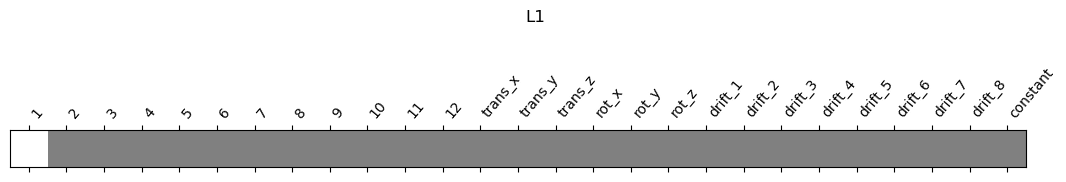

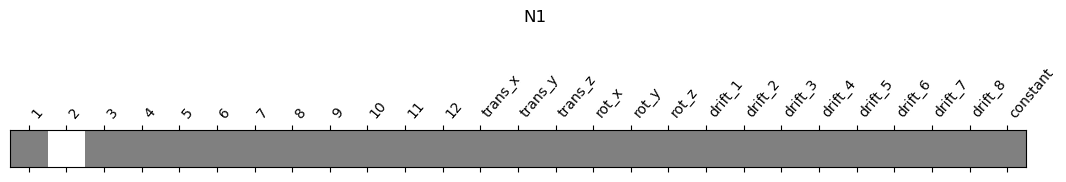

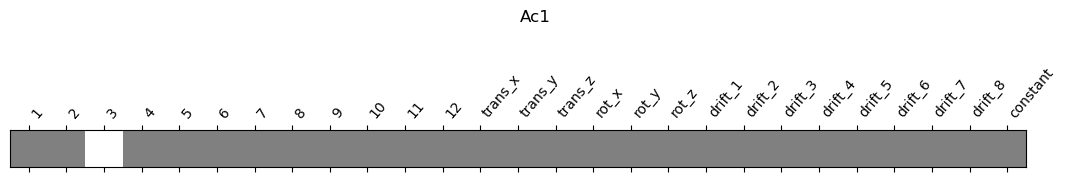

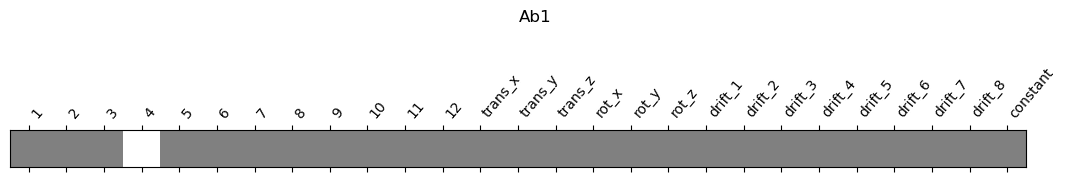

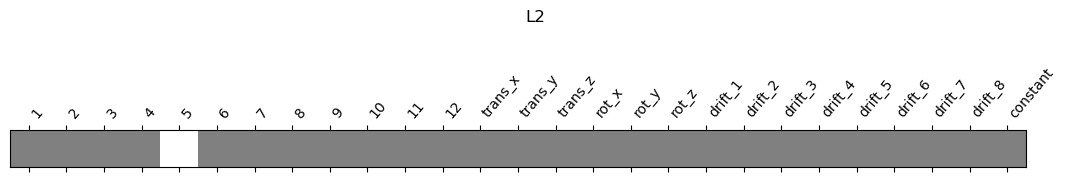

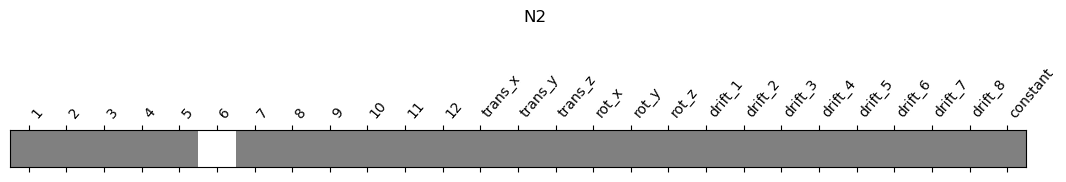

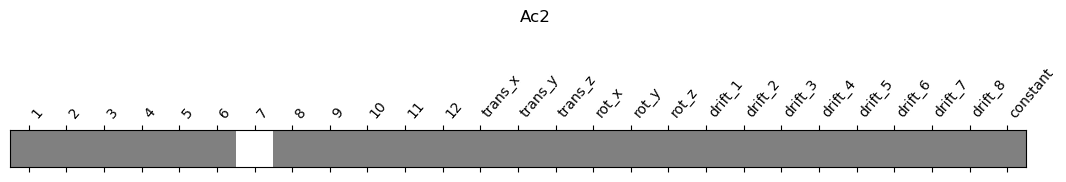

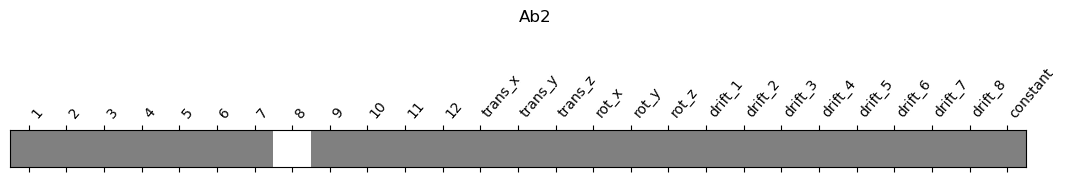

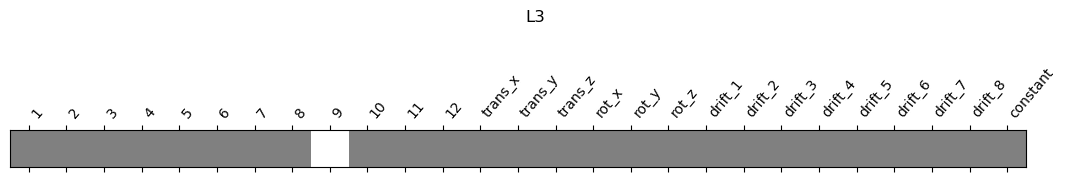

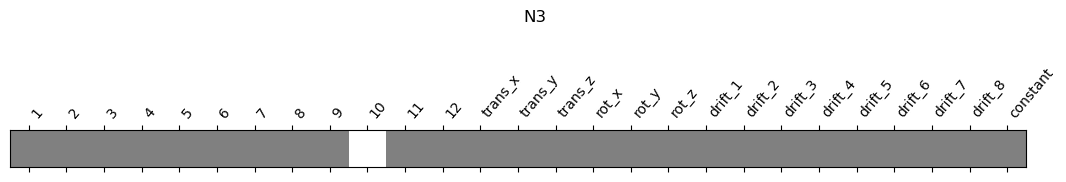

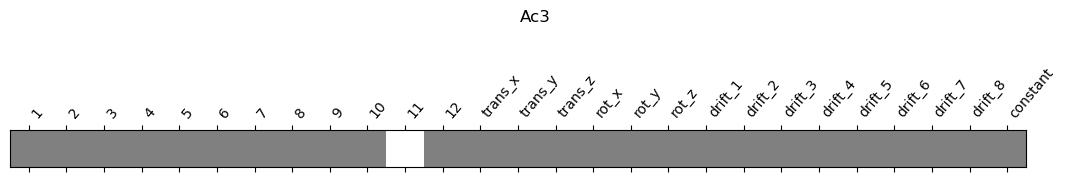

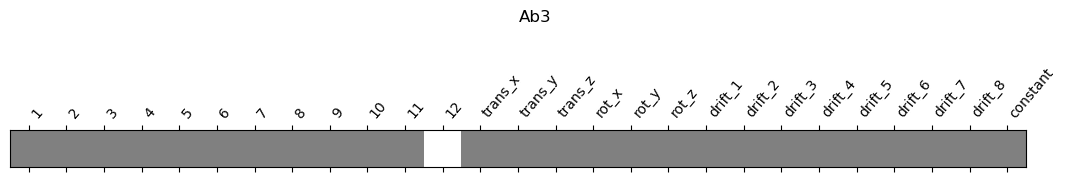

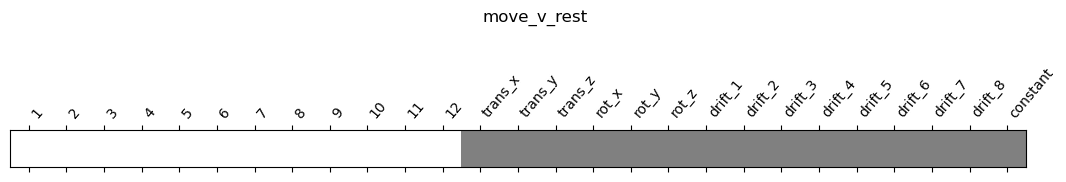

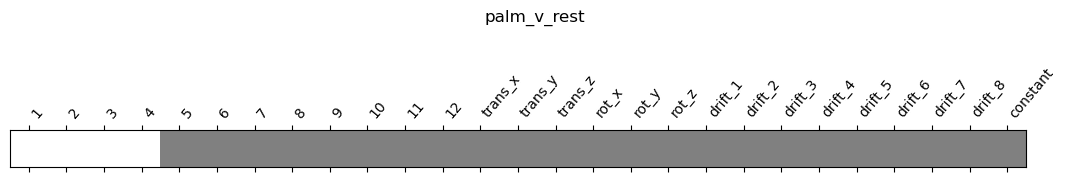

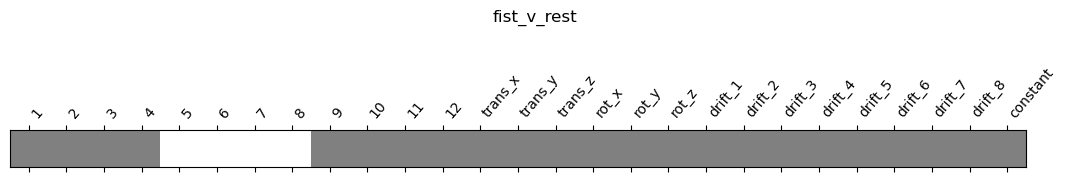

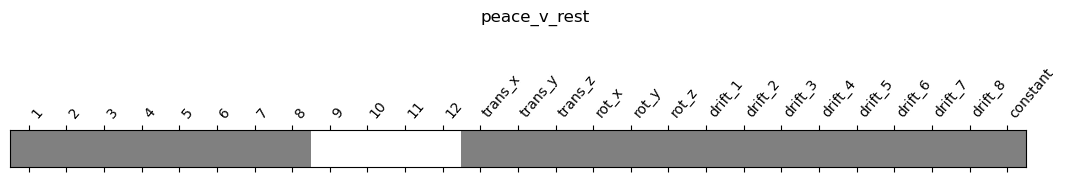

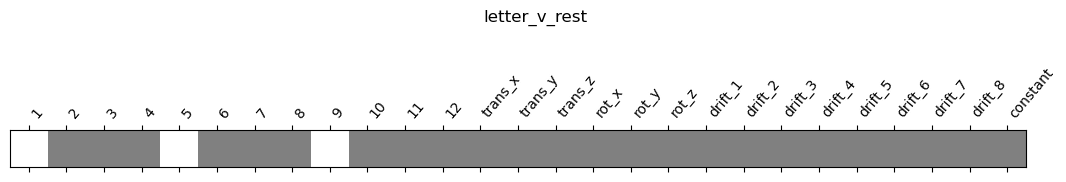

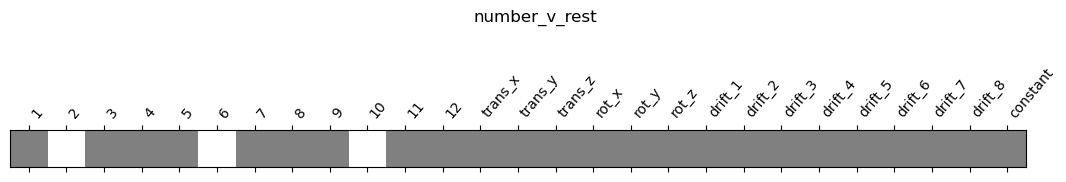

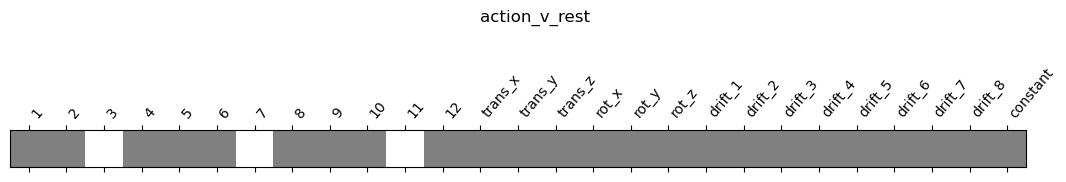

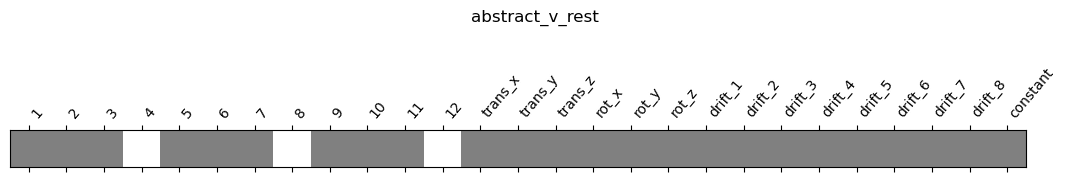

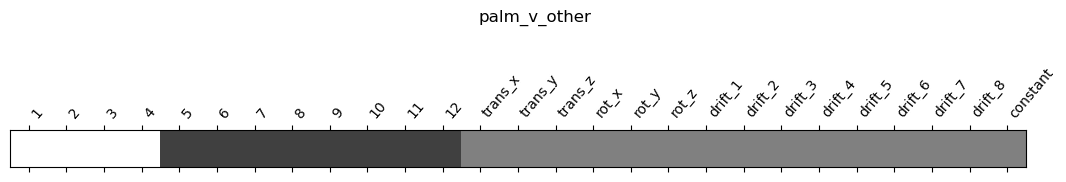

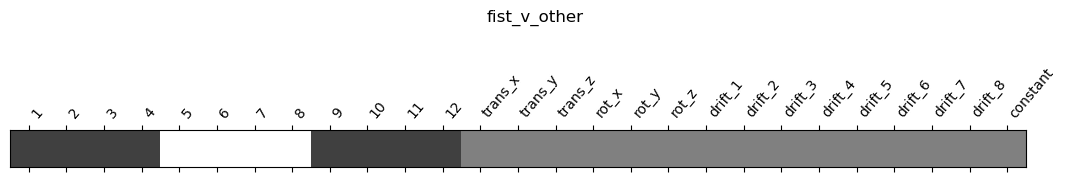

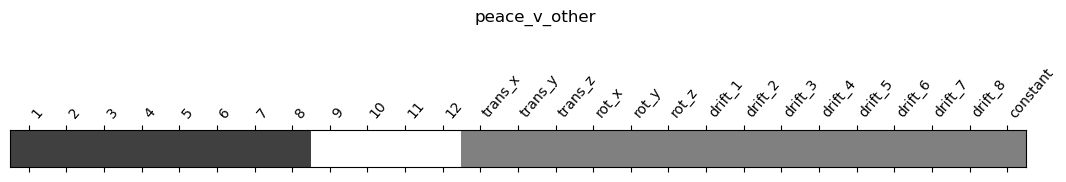

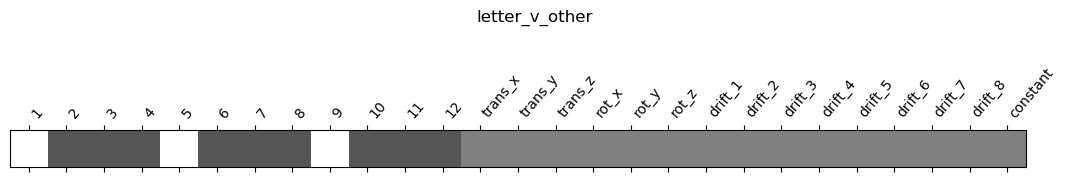

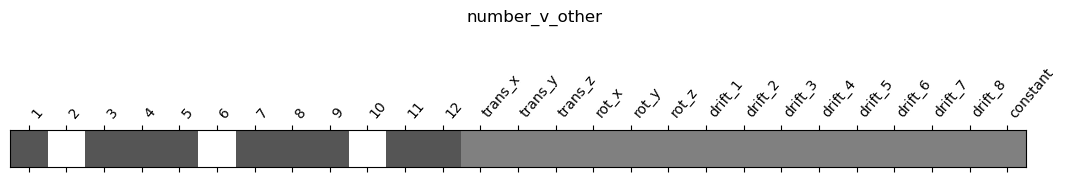

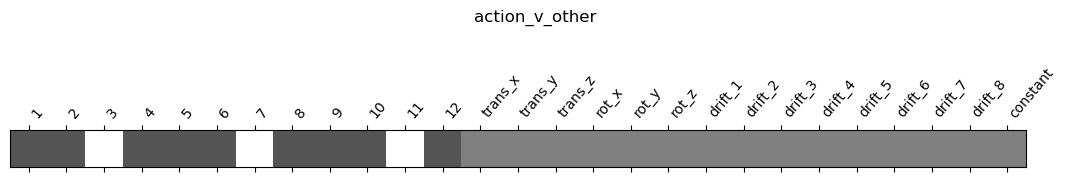

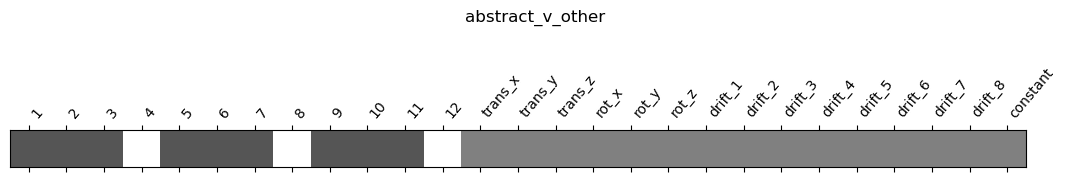

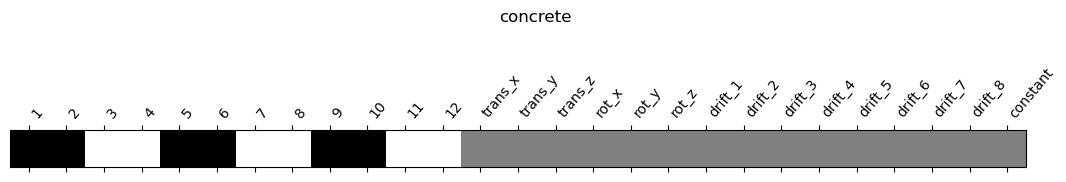

In [19]:
from nilearn.plotting import plot_contrast_matrix
for key, values in contrast_list[0].items():
    plot_contrast_matrix(values, design_matrix=design_matrices[0])
    plt.suptitle(key)

plt.show()

In [20]:
# Compute the contrasts
import os
import sys

model_name = 'first-level'

outdir = os.path.join(ds_path, 'results', model_name, 'sub-' + sID)
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
stats_type = ['effect_size', 'z_score'] #['effect_size', 'stat']
for stats in stats_type:
    for contrast_id in contrast_list[0].keys():    
        stats_map = fmri_glm.compute_contrast(
            [c[contrast_id] for c in contrast_list], 
            output_type = stats)
        # Save results following BIDS standart
        res_name = os.path.basename(bold[0]).split("run")[0]
        stats_map.to_filename(os.path.join(outdir, res_name + 'desc-' + contrast_id + '_' + stats + '.nii.gz'))
        
        z_threshold = 3.1
        #thresholded_map, threshold = threshold_stats_img(stats_map, threshold=z_threshold, height_control='fpr')
        thresholded_map = cluster_level_inference(stats_map, threshold=z_threshold)
        thresholded_map.to_filename(os.path.join(outdir, res_name + 'desc-' + contrast_id + '_' + 'clusterthreshed' + '_' + stats + '.nii.gz'))
        

In [21]:
jason_file = os.path.join(ds_path, 'results', model_name, "dataset_description.json")

if not os.path.exists(jason_file):
    import json
    import datetime
    from importlib.metadata import version

    nilearn_version = version('nilearn')
    date_created = datetime.datetime.now()
    
    # Data to be written
    content = {
        "Name": "First-level GLM analysis",
        "BIDSVersion": "1.4.0",
        "DatasetType": "results",
        "GeneratedBy": [
            {
                "Name": "Nilearn",
                "Version": nilearn_version,
                "CodeURL": "https://nilearn.github.io"
            }
        ],    
        "Date": date_created,
        "FirstLevelModel": [
            fmri_glm.get_params()
        ], 
    }
    
    # Serializing json
    json_object = json.dumps(content, indent=4, default=str)
    
    # Writing to .json
    with open(jason_file, "w") as outfile:
        outfile.write(json_object)